# Buiding a calssifier MLP Using the sequential API

In [1]:
pip install --upgrade pip


  Using cached https://files.pythonhosted.org/packages/00/b6/9cfa56b4081ad13874b0c6f96af8ce16cfbc1cb06bedf8e9164ce5551ec1/pip-19.3.1-py2.py3-none-any.whl
  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pip\\_internal\\build_env.py'
Consider using the `--user` option or check the permissions.



In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
## installing TensorFlow
import tensorflow as tf


## printing the version of tensorflow
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.0.0


In [4]:
## installing Keras
from tensorflow import keras

In [5]:
## printing the version of Keras
print("Keras version:", keras.__version__)

Keras version: 2.2.4-tf


# Building an Image Classifier using sequential API (MNIST Dataset)

In [6]:
## USing keras to load the MNIST dataset (Fashion MNIST Dataset - represents fashion items rather than handwritten digits)
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
## checking shape of imported dataset
print("X training:", X_train_full.shape)
print("y training:", y_train_full.shape)
print("X test:", X_test.shape)
print("y test:", y_test.shape)

X training: (60000, 28, 28)
y training: (60000,)
X test: (10000, 28, 28)
y test: (10000,)


In [8]:
## checking datatype of imported dataset
print("X training datatype:", X_train_full.dtype)
print("y training datatype:", y_train_full.dtype)
print("X test datatype:", X_test.dtype)
print("y test datatype:", y_test.dtype)

X training datatype: uint8
y training datatype: uint8
X test datatype: uint8
y test datatype: uint8


In [9]:
## Though the data is divided inot train and test set but still there is no validation set. So, we are going to create one now.
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0 ## divided by 255 to scale the pixels intensities between 
## 0 and 1

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In  a case of MNIST, when label = 5, it means that the image is handwritten 5. But, in fashion MNIST, we need the list of class names to know what are we dealing with

In [10]:
## class names
class_names = ["T-shirt/top", "Trouser/pants", "Pullover shirt", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
print("Class name 0:", class_names[y_train[0]])
print("Class name 1:", class_names[y_train[1]])
print("Class name 2:", class_names[y_train[2]])
print("Class name 3:", class_names[y_train[3]])
print("Class name 4:", class_names[y_train[4]])
print("Class name 5:", class_names[y_train[5]])
print("Class name 6:", class_names[y_train[6]])
print("Class name 7:", class_names[y_train[7]])
print("Class name 8:", class_names[y_train[8]])
print("Class name 9:", class_names[y_train[9]])

Class name 0: Coat
Class name 1: T-shirt/top
Class name 2: Sneaker
Class name 3: Ankle boot
Class name 4: Ankle boot
Class name 5: Ankle boot
Class name 6: Coat
Class name 7: Coat
Class name 8: Dress
Class name 9: Coat


### Creating the model using the sequential API

In [12]:
## As we know that this is a classification problem, we lets make architecture with 2 hidden layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))


In [13]:
## instead of adding the layers one by one as we didi in above cell, 
### we can pass a list of layers when creating a Sequentia Model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")]) ## here we are using softmax activation function because 
                                                        ##we want o/p between 0 to 9


In [14]:
## Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


None means the batch size can be anything.

In [15]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pydot


Note: you may need to restart the kernel to use updated packages.


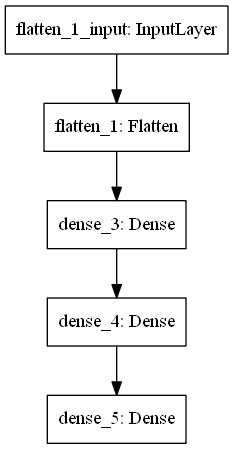

In [42]:
## generate the image of the model
keras.utils.plot_model(model)

##### 1. List of Layers

To fetch a layer by index or by name

In [88]:
model.layers

In [89]:
hidden1 = model.layers[1]
hidden1

In [90]:
hidden1.name

'dense_9'

In [93]:
model.get_layer('dense_9') is hidden1

True

##### 2. Accessing the parameters of layer

get_weights() and set_weights()

In [94]:
weights, biases = hidden1.get_weights()
weights

array([[-0.00339168,  0.01191254,  0.02972996, ...,  0.02391669,
         0.03841774,  0.0411964 ],
       [-0.02349504, -0.01909588,  0.02561674, ..., -0.01275478,
        -0.02059784,  0.04328419],
       [-0.02574055,  0.01039493,  0.06035143, ..., -0.04140482,
         0.06858987, -0.07242046],
       ...,
       [-0.00353561, -0.03031925,  0.06309936, ..., -0.0569768 ,
        -0.03930356,  0.04757505],
       [-0.07121273,  0.07072443, -0.04399658, ...,  0.01534516,
        -0.04294236,  0.03889351],
       [ 0.05958288, -0.04119707,  0.05521899, ...,  0.04169301,
         0.05896089,  0.05477899]], dtype=float32)

In [95]:
weights.shape

(784, 300)

In [96]:
biases

array([ 7.91081786e-02, -1.72636099e-02,  1.14652537e-01, -1.42722297e-03,
       -5.78826293e-02,  3.74614075e-02,  1.05827838e-01, -6.72605708e-02,
        2.35189907e-02,  2.60036322e-03,  6.15675263e-02,  1.71869501e-01,
        1.64688320e-03,  6.76413476e-02,  9.57585201e-02,  8.66950024e-04,
        1.42491562e-02,  1.92295358e-01,  8.36312249e-02,  1.37443379e-01,
        1.90725535e-01, -3.69195156e-02,  4.59106974e-02,  1.16264150e-01,
       -5.87143824e-02,  7.57276118e-02, -3.45930308e-02,  1.00496568e-01,
        9.64906663e-02,  2.56357547e-02, -2.61536408e-02, -8.05948675e-03,
        2.80763954e-02,  8.29095617e-02,  1.01907462e-01,  7.07502440e-02,
       -4.79458794e-02,  8.85884538e-02, -1.43530369e-02,  7.33372942e-02,
       -2.46370398e-02,  1.13552608e-01,  1.18430562e-01,  6.94219545e-02,
        4.32079211e-02,  2.70289984e-02, -2.03755274e-02, -3.66260633e-02,
        9.38731730e-02,  8.30409080e-02, -6.90505281e-03, -5.96541688e-02,
       -2.23702267e-02,  

In [97]:
biases.shape

(300,)

### Compiling the model

Once the model is created, you are required to call its compile() method to specify the loss function and the optimizer to use. 

In [98]:
model.compile(loss ='sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

--->>'sparse_categorical_crossentropy' is used here because we have sparse labels (which means for each instance, there is just a target class index, from 0 to 9 in this case).

--->> 'sgd' is used because we will train the model using simple stochastic Gradient Descent. In other words, Keras will perform backpropogation algorithm .

### Training and Evaluating the model

In [99]:
## First we are required to call its fit() method:

history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 85us/sample - loss: 0.2259 - accuracy: 0.9173 - val_loss: 0.2982 - val_accuracy: 0.8928
Epoch 2/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.2219 - accuracy: 0.9200 - val_loss: 0.2989 - val_accuracy: 0.8924
Epoch 3/30
55000/55000 [==============================] - 4s 74us/sample - loss: 0.2185 - accuracy: 0.9211 - val_loss: 0.2862 - val_accuracy: 0.8940
Epoch 4/30
55000/55000 [==============================] - 4s 77us/sample - loss: 0.2150 - accuracy: 0.9228 - val_loss: 0.3234 - val_accuracy: 0.8840
Epoch 5/30
55000/55000 [==============================] - 4s 80us/sample - loss: 0.2128 - accuracy: 0.9237 - val_loss: 0.2982 - val_accuracy: 0.8908
Epoch 6/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.2090 - accuracy: 0.9248 - val_loss: 0.3004 - val_accuracy: 0.8910
Epoch 7/30
55000/55000 [==============================] -

## instead of validation data, we can also use validation split (percentage of training data for validation) for validation
history = model.fit(X_train, y_train, epochs = 30, validation_split= 0.1)


In case the training set is very skwed, with some classes being overrepresented and others underpresented, it will be useful to se the "class_weight" argument when calling the fit() method. 

In [102]:
## History of the training parameters
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [103]:
## list of epochs model went through
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [104]:
## dictonary containing the loss and extra metrics it measured at the end of each epochs on training set and on validation set
history.history

{'loss': [0.22587474026788365,
  0.22189765223698182,
  0.21852029783942484,
  0.2149780544595285,
  0.21281819863752885,
  0.20904568436904386,
  0.20573499452309174,
  0.2025407006534663,
  0.19928526877489958,
  0.19610441732731732,
  0.1939084201910279,
  0.18997940213680267,
  0.18792779395688664,
  0.18426930791681462,
  0.18303112175627187,
  0.1787548844781789,
  0.1768925801493905,
  0.17435773649107325,
  0.17186741179986434,
  0.169629451965202,
  0.16453022257279265,
  0.16357953241277826,
  0.16111110171079635,
  0.15812645682204854,
  0.15759211670106107,
  0.15525971093286167,
  0.1511249163486741,
  0.14894918931722642,
  0.14538781190948052,
  0.1443353591252457],
 'accuracy': [0.9172909,
  0.9200364,
  0.9210909,
  0.92283636,
  0.92365456,
  0.9247818,
  0.9261818,
  0.9274182,
  0.9284545,
  0.9302,
  0.93085456,
  0.9329636,
  0.9319636,
  0.9343455,
  0.934,
  0.93654543,
  0.9368182,
  0.93756366,
  0.93814546,
  0.9387091,
  0.94183636,
  0.94225454,
  0.9431454

#### Getting the learning curves

If we use the dictonary (obtained through history.history) to create pandas DataFrame and call its plot() method, we can get leaning curves.

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
parameters = pd.DataFrame(history.history)
parameters

,loss,accuracy,val_loss,val_accuracy
0,0.225875,0.917291,0.298173,0.8928
1,0.221898,0.920036,0.298855,0.8924
2,0.218520,0.921091,0.286190,0.8940
3,0.214978,0.922836,0.323357,0.8840
4,0.212818,0.923655,0.298152,0.8908
5,0.209046,0.924782,0.300372,0.8910
6,0.205735,0.926182,0.295340,0.8926
7,0.202541,0.927418,0.300830,0.8880
8,0.199285,0.928455,0.298254,0.8938
9,0.196104,0.930200,0.293597,0.8936


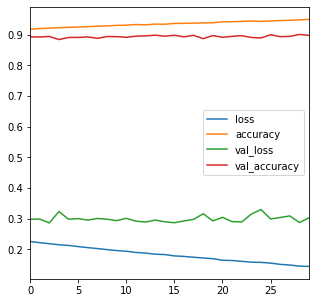

In [107]:
parameters.plot(figsize = (5,5))



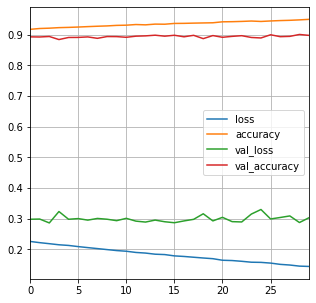

In [108]:
parameters.plot(figsize = (5,5))
plt.grid(True)

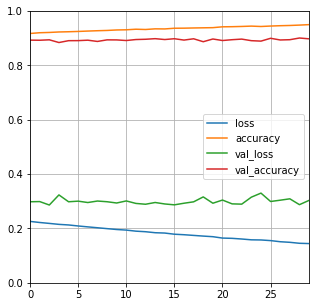

In [109]:
parameters.plot(figsize = (5,5))
plt.grid(True)
plt.gca().set_ylim(0,1)  ## setting the vertical range to [0 - 1]
plt.show()

From here, we can see that during training both training accuracy and validation accuracy is incrasing steadily. On the other hand, validation loss and training loss is decreasing. 

Moreover, validation curves are closer to training curves, which means that there is not too much overfitting.

Note:If you are not happy with the performance of the model, then:
        
        --> Option 1: check the learning rate 
        --> Option 2:try another optimizer (and always retune the learning rate after changing the hyperparameter).
        --> Option 3:try tuning other hyper parameters, such as batch_size , sample_weight
        
    
    
    

In [110]:
## Now evaluating the test samples
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[71.67603525390625, 0.8551]

#### using this build model to make predictions

Since, we don't have actual new instances, we will just use the first three instances of the test set:

In [111]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

In [112]:
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Here, we can see for each instance the model estimates one probability per class from 0 to 9.For first row, we can say that the last "Ankle boot", for second "Pullover shirt" and for third "Trouser/top" is predicted by the model.


## class names
class_names = ["T-shirt/top", "Trouser/pants", "Pullover shirt", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In case we, want the highest estimated probabiltiy (however, in this case its there is no other estimated probabilties), then we can use the predict_classes() method:

In [113]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [114]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover shirt', 'Trouser/pants'], dtype='<U14')